# Imports

In [1]:
# Adding parent dir to sys.path to import functions
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [2]:
from data.data_handler import Data
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

c:\Users\bjham\Documents\programming\venvs\predict-at-bat-outcome\dev\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Baseball Spider Data

## Gather Data

Using the `Data` class in data_handler.py, the data is gathered into a single pd.DataFrame for analysis.

In [3]:
abs = Data(['F:/baseball/active_player_abs', 'F:/baseball/statcast_running'], ['mlb_id','season'])

## Basic Metrics

Gathering basic stats to help guide future analysis.

### Basic File Information

In [4]:
display(abs.data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778449 entries, 0 to 778448
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player          778449 non-null  object 
 1   mlb_id          778449 non-null  object 
 2   position        778449 non-null  object 
 3   game_date       778449 non-null  object 
 4   pitcher         778449 non-null  object 
 5   result          778449 non-null  object 
 6   exit_velocity   527480 non-null  float64
 7   launch_angle    527426 non-null  float64
 8   distance        485924 non-null  float64
 9   direction       537192 non-null  object 
 10  pitch_velocity  772478 non-null  float64
 11  pitch_type      20674 non-null   object 
 12  season          778449 non-null  int64  
 13  ft/s            772285 non-null  float64
 14  hp-1st          752424 non-null  float64
 15  bolts           277651 non-null  float64
 16  pos_rank        772285 non-null  float64
 17  age_rank  

None

In [5]:
display(abs.data.head())

,player,mlb_id,position,game_date,pitcher,result,exit_velocity,launch_angle,distance,direction,pitch_velocity,pitch_type,season,ft/s,hp-1st,bolts,pos_rank,age_rank,league_rank,percentile
0,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"Feliz, Neftali",intent_walk,NaN,NaN,NaN,NaN,50.7,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3
1,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"VerHagen, Drew",strikeout,NaN,NaN,NaN,NaN,78.4,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3
2,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"Verlander, Justin",field_out,82.1,28.0,276.0,Straightaway,93.9,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3
3,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"Verlander, Justin",strikeout,NaN,NaN,NaN,NaN,88.0,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3
4,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"Verlander, Justin",field_out,80.0,69.0,NaN,Straightaway,78.0,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3


In [52]:
print('Distinct years:', pd.to_datetime(abs.data.game_date).dt.year.unique())
print('\nDistinct results:', abs.data.result.unique())
print('\nDistinct positions:', abs.data.position.unique())
print('\nUnique players count:', len(abs.data.mlb_id.unique()))
print('\nUnique opp pitcher count:', len(abs.data.pitcher.unique()))


Distinct years: [2015 2016 2017 2018 2019 2020]

Distinct results: ['intent_walk' 'strikeout' 'field_out' 'single' 'home_run' 'walk' 'double'
 'field_error' 'hit_by_pitch' 'sac_fly' 'grounded_into_double_play'
 'force_out' 'double_play' 'triple' 'fielders_choice_out'
 'fielders_choice' 'strikeout_double_play' 'interf_def' 'triple_play'
 'sac_bunt' 'sac_fly_double_play' 'batter_interference'
 'sac_bunt_double_play']

Distinct positions: ['1B' '2B' '3B' 'CF' 'C' 'DH' 'LF' 'OF' 'RF' 'SS']

Unique players count: 727

Unique opp pitcher count: 1668


### Distributions

In [60]:
pd.to_datetime(abs.data.game_date).dt.year.value_counts()

2019    175027
2018    161789
2017    146028
2016    123405
2015    106792
2020     65408
Name: game_date, dtype: int64

In [61]:
display(abs.data.result.value_counts())

field_out                    309117
strikeout                    165531
single                       114012
walk                          63044
double                        36092
home_run                      26138
force_out                     15584
grounded_into_double_play     15099
hit_by_pitch                   7898
field_error                    6464
sac_fly                        5013
intent_walk                    3944
triple                         3672
sac_bunt                       1969
double_play                    1836
fielders_choice_out            1296
fielders_choice                 807
strikeout_double_play           619
interf_def                      215
sac_fly_double_play              67
triple_play                      21
batter_interference               6
sac_bunt_double_play              5
Name: result, dtype: int64

In [59]:
abs.data.position.value_counts()

2B    107529
3B    105912
1B     96784
LF     92748
C      92724
RF     90439
SS     89674
CF     80382
OF     16760
DH      5497
Name: position, dtype: int64

In [48]:
display(abs.data.describe())

,exit_velocity,launch_angle,distance,pitch_velocity
count,527480.000000,527426.000000,485924.000000,772478.000000
mean,88.448861,12.224473,171.108021,88.775303
std,13.480516,26.956441,136.668563,5.898683
min,5.200000,-89.000000,0.000000,38.100000
25%,80.000000,-6.000000,23.000000,84.700000
50%,90.300000,12.000000,168.000000,89.900000
75%,98.800000,30.000000,293.000000,93.400000
max,122.200000,90.000000,505.000000,105.400000


### Distributions

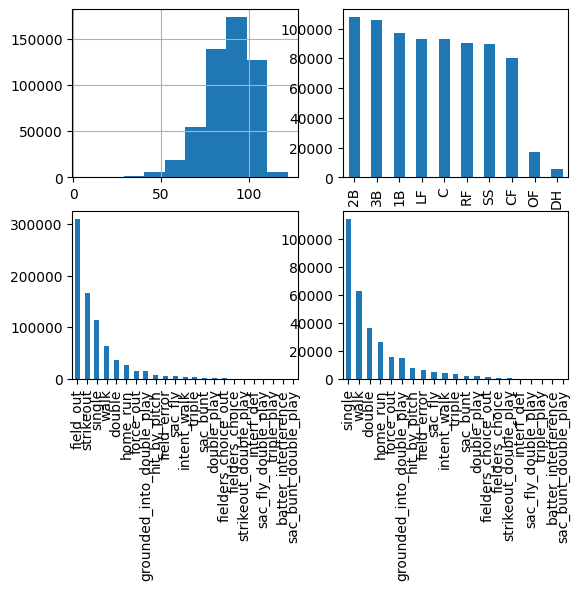

In [46]:
figure, ax = plt.subplots(2,2)

ax1 = abs.data.result.value_counts().plot(kind='bar', ax=ax[1,0])
ax2 = abs.data.position.value_counts().plot(kind='bar', ax=ax[0,1])
ax3 = abs.data.exit_velocity.hist(ax=ax[0,0])
ax4 = abs.data.loc[~abs.data.result.isin(['field_out','strikeout'])].result.value_counts().plot(kind='bar', ax=ax[1,1])


## Result by exit velocity and launch angle

In [10]:
abs.clean()

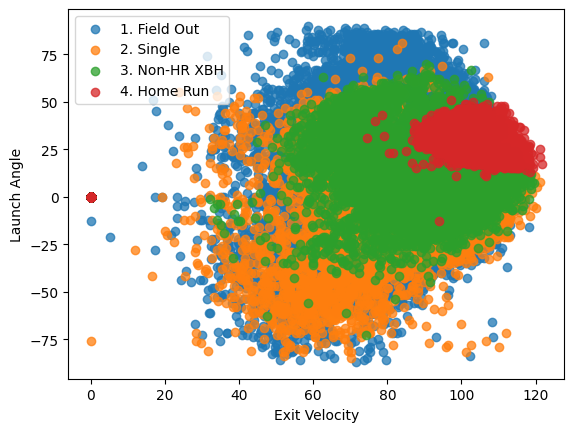

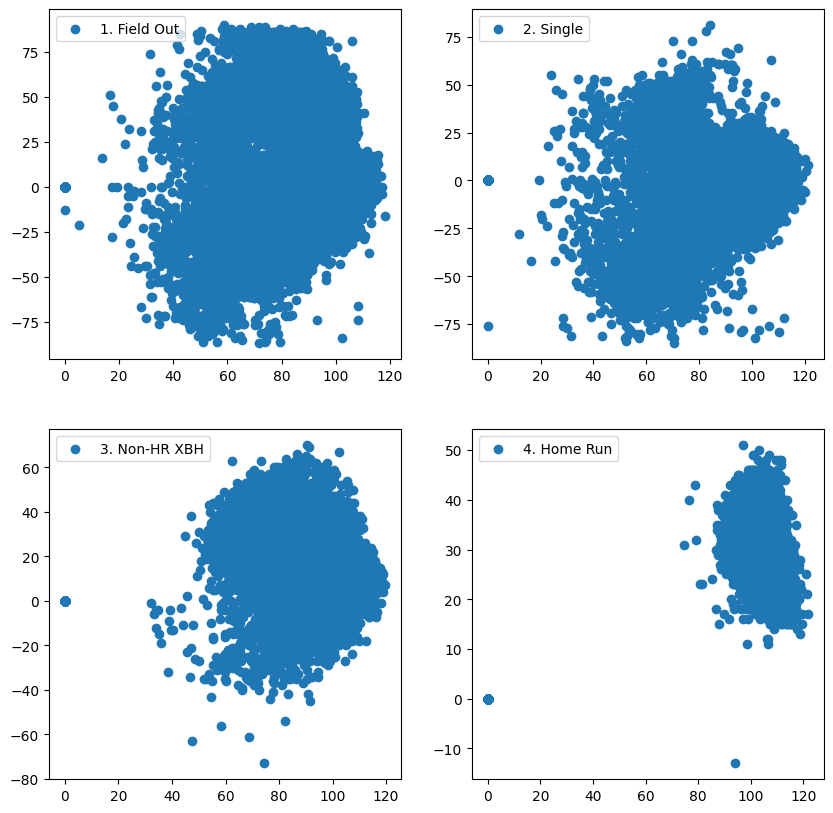

In [80]:
df = abs.data.copy()
df.loc[df.result.eq('field_out'), 'result'] = '1. Field Out'
df.loc[df.result.eq('single'), 'result'] = '2. Single'
df.loc[df.result.eq('non_hr_xbh'), 'result'] = '3. Non-HR XBH'
df.loc[df.result.eq('home_run'), 'result'] = '4. Home Run'

fig1, ax1 = plt.subplots()
fig2 = plt.figure(figsize=(10,10))#.subplots(1, 4)
ax2 = {}
for i in range(1, 5):
    ax2[i] = fig2.add_subplot(int(f'22{i}'))

for k, v in df.groupby('result'):
    ax1.scatter(v['exit_velocity'], v['launch_angle'], label=k, alpha=0.75)

i = 1
for k, v in df.groupby('result'):
    ax2[i].scatter(v['exit_velocity'], v['launch_angle'], label=k)
    i += 1

ax1.legend(loc=2)
ax1.set_xlabel('Exit Velocity')
ax1.set_ylabel('Launch Angle')
[ax2[i].legend(loc=2) for i in range(1, 5)]

## Label Distribution

<AxesSubplot: >

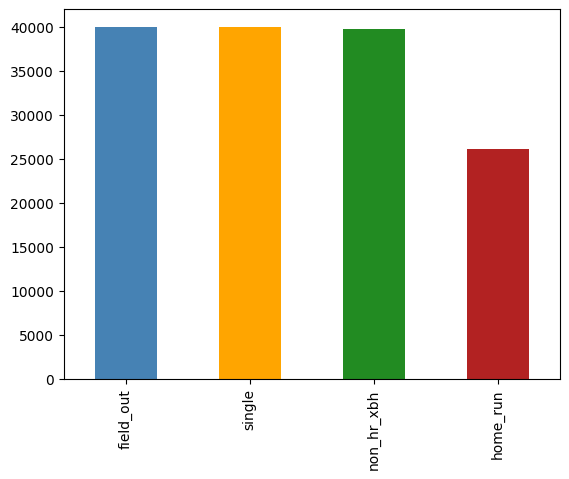

In [87]:
abs.data.result.value_counts().plot.bar(color=['steelblue', 'orange','forestgreen', 'firebrick'])

## Direction distribution

count    145902.000000
mean         26.944931
std           2.655295
min           0.000000
25%          26.100000
50%          27.200000
75%          28.200000
max          30.900000
Name: ft/s, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145902 entries, 4 to 778439
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player          145902 non-null  object 
 1   mlb_id          145902 non-null  object 
 2   position        145902 non-null  object 
 3   game_date       145902 non-null  object 
 4   pitcher         145902 non-null  object 
 5   result          145902 non-null  object 
 6   exit_velocity   145902 non-null  float64
 7   launch_angle    145902 non-null  float64
 8   distance        145902 non-null  float64
 9   direction       145902 non-null  object 
 10  pitch_velocity  145902 non-null  float64
 11  pitch_type      145902 non-null  object 
 12  season          145902 non-nu

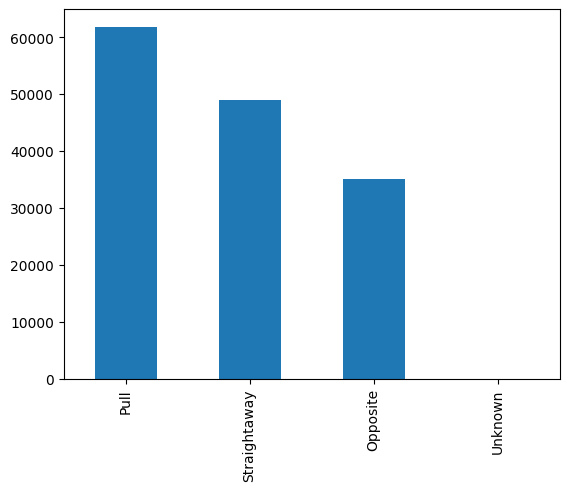

In [97]:
abs.data.loc[~abs.data.direction.isnull()].direction.value_counts().plot.bar()
print(abs.data['ft/s'].describe())
abs.data.info()

# Pybaseball Data

In [4]:
p = Data('F:/baseball/statcast_pitch/')

c:\Users\bjham\Documents\programming\projects\predict-at-bat-outcome\src\predict_at_bat_outcome\analysis\..\data\data_handler.py:83: DtypeWarning: Columns (0,78,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(csv))


## Basic Info

In [8]:
p.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479762 entries, 0 to 5479761
Data columns (total 93 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   pitch_type                       object 
 1   game_date                        object 
 2   release_speed                    float64
 3   release_pos_x                    float64
 4   release_pos_z                    float64
 5   player_name                      object 
 6   batter                           int64  
 7   pitcher                          int64  
 8   events                           object 
 9   description                      object 
 10  spin_dir                         float64
 11  spin_rate_deprecated             float64
 12  break_angle_deprecated           float64
 13  break_length_deprecated          float64
 14  zone                             float64
 15  des                              object 
 16  game_type                        object 
 17  stand   

In [9]:
p.data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [37]:
print('Distinct years:', pd.to_datetime(p.data.game_date).dt.year.unique())
print('\nDistinct results:', p.data.events.unique())
print('\nUnique players count:', len(p.data.batter.unique()))
print('\nUnique opp pitcher count:', len(p.data.pitcher.unique()))

Distinct years: [2015 2016 2017 2018 2019 2020 2021 2022]

Distinct results: ['strikeout' nan 'field_out' 'double' 'single' 'double_play' 'walk'
 'sac_fly' 'fielders_choice' 'grounded_into_double_play' 'force_out'
 'sac_bunt' 'triple' 'home_run' 'caught_stealing_2b'
 'sac_bunt_double_play' 'intent_walk' 'field_error' 'other_out'
 'hit_by_pitch' 'fielders_choice_out' 'strikeout_double_play'
 'sac_fly_double_play' 'caught_stealing_3b' 'caught_stealing_home'
 'pickoff_2b' 'pickoff_1b' 'triple_play' 'wild_pitch'
 'pickoff_caught_stealing_3b' 'catcher_interf' 'pickoff_3b' 'ejection'
 'passed_ball' 'pickoff_caught_stealing_2b' 'stolen_base_3b'
 'pickoff_caught_stealing_home' 'pickoff_error_2b' 'game_advisory'
 'stolen_base_home' 'stolen_base_2b' 'runner_double_play']

Unique players count: 3549

Unique opp pitcher count: 2643


In [36]:
p.data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,season
0,SL,2015-04-30,84.7,-1.53,5.34,"Storen, Drew",608700,519322,strikeout,swinging_strike,...,8,2,2,8,Standard,Standard,NaN,0.000,-0.060,2015
1,SL,2015-04-30,83.1,-1.75,5.48,"Storen, Drew",608700,519322,NaN,swinging_strike,...,8,2,2,8,Standard,Standard,NaN,0.000,-0.022,2015
2,FF,2015-04-30,94.5,-1.58,5.33,"Storen, Drew",608700,519322,NaN,called_strike,...,8,2,2,8,Standard,Standard,NaN,0.000,-0.016,2015
3,SI,2015-04-30,94.4,-1.53,5.27,"Storen, Drew",527038,519322,field_out,hit_into_play,...,8,2,2,8,Standard,Standard,NaN,-0.001,-0.130,2015
4,FF,2015-04-30,95.4,-1.58,5.21,"Storen, Drew",527038,519322,NaN,called_strike,...,8,2,2,8,Standard,Standard,NaN,0.000,-0.025,2015


## Cleaning to only in-play results

In [33]:
keep = ['field_out', 'double', 'single', 'double_play', 'sac_fly',
            'fielders_choice', 'grounded_into_double_play', 'force_out',
            'triple', 'home_run', 'field_error','fielders_choice_out',
            'triple_play', 'sac_bunt']
field_out = ['fielders_choice', 'triple_play','sac_bunt',
            'fielders_choice_out', 'double_play', 'field_error',
            'force_out', 'grounded_into_double_play', 'sac_fly']
non_hr_xbh = ['double', 'triple']

df = p.data.loc[p.data.events.isin(keep)]
df.loc[df.events.isin(field_out), ['events']] = 'field_out'
df.loc[df.events.isin(non_hr_xbh), ['events']] = 'non_hr_xbh'
df = df.loc[~df.hc_x.isnull()]

print(df.info())
print(df.events.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959011 entries, 3 to 5479761
Data columns (total 93 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pitch_type                       937901 non-null  object 
 1   game_date                        959011 non-null  object 
 2   release_speed                    938332 non-null  float64
 3   release_pos_x                    938166 non-null  float64
 4   release_pos_z                    938166 non-null  float64
 5   player_name                      959011 non-null  object 
 6   batter                           959011 non-null  int64  
 7   pitcher                          959011 non-null  int64  
 8   events                           959011 non-null  object 
 9   description                      959011 non-null  object 
 10  spin_dir                         0 non-null       float64
 11  spin_rate_deprecated             0 non-null       float64
 12  b

## Horizontal Launch Angle Calc

In [34]:
# Formula: tan((hc_x - 128) / (208 - hc_y)) * 180 / pi * 0.75

df['la_xy'] = np.tan((df['hc_x'] - 128.) / (208. - df['hc_y'])) * 180. / np.pi * 0.75
df[['la_xy']].info()
df[['la_xy']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959011 entries, 3 to 5479761
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   la_xy   959009 non-null  float64
dtypes: float64(1)
memory usage: 14.6 MB


c:\Users\bjham\Documents\programming\venvs\predict-at-bat-outcome\dev\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in tan
  result = getattr(ufunc, method)(*inputs, **kwargs)


,la_xy
3,-16.506060
9,-27.104365
16,-16.044447
19,20.586057
21,18.620442


## Results by LA and EV

C:\Users\bjham\AppData\Local\Temp\ipykernel_19740\1442062568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.events.eq('field_out'), 'result'] = '1. Field Out'


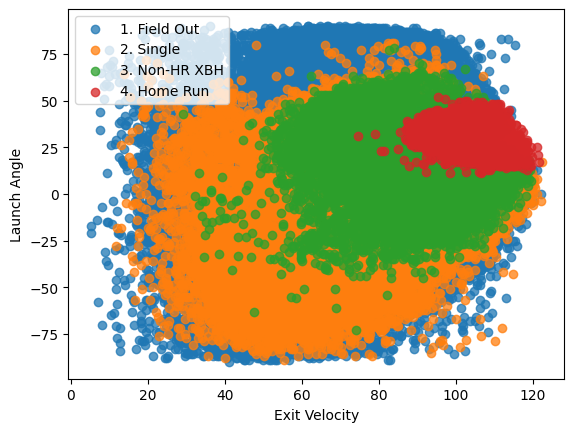

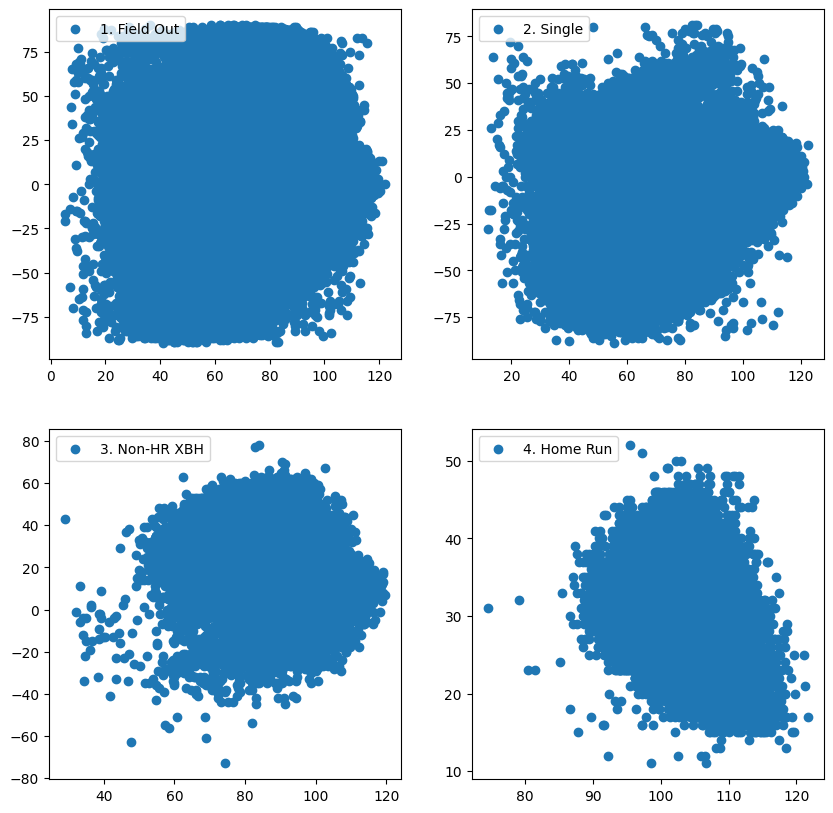

In [38]:
df.loc[df.events.eq('field_out'), 'result'] = '1. Field Out'
df.loc[df.events.eq('single'), 'result'] = '2. Single'
df.loc[df.events.eq('non_hr_xbh'), 'result'] = '3. Non-HR XBH'
df.loc[df.events.eq('home_run'), 'result'] = '4. Home Run'

fig1, ax1 = plt.subplots()
fig2 = plt.figure(figsize=(10,10))#.subplots(1, 4)
ax2 = {}
for i in range(1, 5):
    ax2[i] = fig2.add_subplot(int(f'22{i}'))

for k, v in df.groupby('result'):
    ax1.scatter(v['launch_speed'], v['launch_angle'], label=k, alpha=0.75)

i = 1
for k, v in df.groupby('result'):
    ax2[i].scatter(v['launch_speed'], v['launch_angle'], label=k)
    i += 1

ax1.legend(loc=2)
ax1.set_xlabel('Exit Velocity')
ax1.set_ylabel('Launch Angle')
[ax2[i].legend(loc=2) for i in range(1, 5)]

## Label Distribution

field_out 645645
non_hr_xbh 68504
single 201281
home_run 43581


<AxesSubplot: >

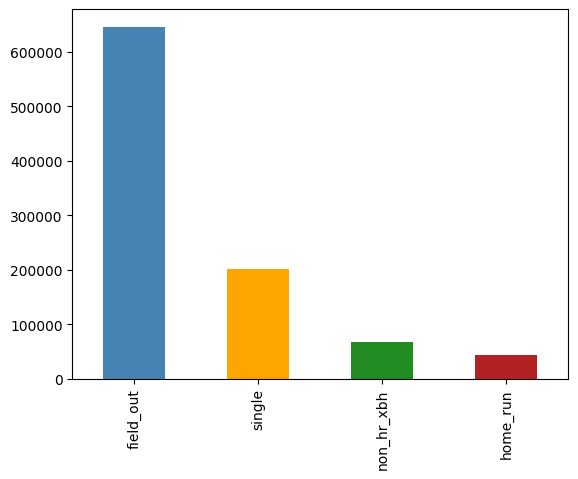

In [61]:
for event in df.events.unique():
    print(event, len(df.loc[df.events.eq(event)]))
df.events.value_counts().plot.bar(color=['steelblue', 'orange','forestgreen', 'firebrick'])

NOTE: field outs and singles will both be reduced to roughly 70k instances a piece for modeling.

non_hr_xbh 68504
single 70000
field_out 70000
home_run 43581


<AxesSubplot: >

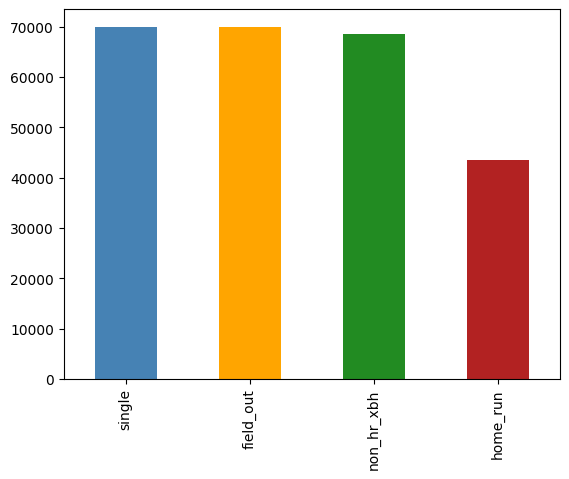

In [78]:
row_ceil = 70_000
field_outs = df.loc[df.events.eq('field_out'), 'events'].count()
reduced_field_outs = field_outs - row_ceil
singles = df.loc[df.events.eq('single'), 'events'].count()
reduced_singles = singles - row_ceil

df2 = df.drop(df[df['events'].eq('field_out')].sample(reduced_field_outs).index)
df2 = df2.drop(df2[df2['events'].eq('single')].sample(reduced_singles).index)

for event in df2.events.unique():
    print(event, len(df2.loc[df2.events.eq(event)]))
df2.events.value_counts().plot.bar(color=['steelblue', 'orange','forestgreen', 'firebrick'])

## Examining Features for v5.0

In [138]:
df2 = df[['batter','season','launch_speed','launch_angle','la_xy','effective_speed','release_spin_rate','zone','stand','p_throws','if_fielding_alignment','of_fielding_alignment','events']]
df2['batter'] = df2['batter'].astype(str)
df2.info()

C:\Users\bjham\AppData\Local\Temp\ipykernel_24076\2278402322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['batter'] = df2['batter'].astype(str)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 959011 entries, 3 to 5479761
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   batter                 959011 non-null  object 
 1   season                 959011 non-null  int64  
 2   launch_speed           925249 non-null  float64
 3   launch_angle           925306 non-null  float64
 4   la_xy                  959009 non-null  float64
 5   effective_speed        933264 non-null  float64
 6   release_spin_rate      911983 non-null  float64
 7   zone                   938201 non-null  float64
 8   stand                  959011 non-null  object 
 9   p_throws               959011 non-null  object 
 10  if_fielding_alignment  924276 non-null  object 
 11  of_fielding_alignment  924276 non-null  object 
 12  events                 959011 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 102.4+ MB


In [54]:
df2.head()

,batter,season,launch_speed,launch_angle,la_xy,effective_speed,release_spin_rate,zone,stand,p_throws,if_fielding_alignment,of_fielding_alignment,events
3,527038,2015,86.1,-15.0,-16.506060,94.1,1907.0,4.0,R,R,Standard,Standard,field_out
9,467092,2015,93.4,-9.0,-27.104365,91.8,2360.0,4.0,R,L,Standard,Standard,field_out
16,547180,2015,99.3,18.0,-16.044447,92.2,2322.0,5.0,L,L,Standard,Standard,non_hr_xbh
19,150029,2015,103.2,3.0,20.586057,90.4,2336.0,2.0,R,R,Standard,Standard,single
21,488862,2015,72.5,21.0,18.620442,85.7,2023.0,1.0,R,R,Standard,Standard,single


### Join Running Data

In [136]:
run = Data('F:/baseball/statcast_running/')
run.data['mlb_id_suffix'] = run.data['mlb_id'].str.split('-').str[-1].astype(str)
run.data = run.data.rename(columns={'mlb_id_suffix':'batter'})

In [137]:
run.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mlb_id       4616 non-null   object 
 1   season       4616 non-null   int64  
 2   ft/s         4616 non-null   float64
 3   hp-1st       3796 non-null   float64
 4   bolts        1237 non-null   float64
 5   pos_rank     4616 non-null   int64  
 6   age_rank     4616 non-null   int64  
 7   league_rank  4616 non-null   int64  
 8   percentile   4616 non-null   float64
 9   batter       4616 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 360.8+ KB


In [45]:
run.data.head()

,mlb_id,season,ft/s,hp-1st,bolts,pos_rank,age_rank,league_rank,percentile,batter
0,cj-abrams-682928,2022,29.0,4.21,24.0,12,5,59,90.7,682928
1,jose-abreu-547989,2015,25.6,4.77,NaN,36,52,492,27.3,547989
2,jose-abreu-547989,2016,25.6,4.64,NaN,36,43,490,28.6,547989
3,jose-abreu-547989,2017,26.8,4.53,NaN,16,23,356,47.1,547989
4,jose-abreu-547989,2018,26.7,4.53,NaN,19,19,371,44.7,547989


In [139]:
df3 = df2.merge(run.data, on=['batter', 'season'], how='left')

In [140]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959011 entries, 0 to 959010
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   batter                 959011 non-null  object 
 1   season                 959011 non-null  int64  
 2   launch_speed           925249 non-null  float64
 3   launch_angle           925306 non-null  float64
 4   la_xy                  959009 non-null  float64
 5   effective_speed        933264 non-null  float64
 6   release_spin_rate      911983 non-null  float64
 7   zone                   938201 non-null  float64
 8   stand                  959011 non-null  object 
 9   p_throws               959011 non-null  object 
 10  if_fielding_alignment  924276 non-null  object 
 11  of_fielding_alignment  924276 non-null  object 
 12  events                 959011 non-null  object 
 13  mlb_id                 930678 non-null  object 
 14  ft/s                   930678 non-nu

In [141]:
df3.head()

,batter,season,launch_speed,launch_angle,la_xy,effective_speed,release_spin_rate,zone,stand,p_throws,...,of_fielding_alignment,events,mlb_id,ft/s,hp-1st,bolts,pos_rank,age_rank,league_rank,percentile
0,527038,2015,86.1,-15.0,-16.506060,94.1,1907.0,4.0,R,R,...,Standard,field_out,wilmer-flores-527038,25.8,4.53,NaN,61.0,30.0,477.0,29.5
1,467092,2015,93.4,-9.0,-27.104365,91.8,2360.0,4.0,R,L,...,Standard,field_out,wilson-ramos-467092,23.9,5.00,NaN,86.0,61.0,611.0,9.6
2,547180,2015,99.3,18.0,-16.044447,92.2,2322.0,5.0,L,L,...,Standard,non_hr_xbh,bryce-harper-547180,27.7,4.34,1.0,23.0,12.0,200.0,70.5
3,150029,2015,103.2,3.0,20.586057,90.4,2336.0,2.0,R,R,...,Standard,single,jayson-werth-150029,25.9,4.66,NaN,83.0,7.0,474.0,29.9
4,488862,2015,72.5,21.0,18.620442,85.7,2023.0,1.0,R,R,...,Standard,single,yunel-escobar-488862,25.6,4.65,NaN,42.0,21.0,497.0,26.5
